# Homework 6: Group 1
#### Logistic Regression

David Jung, Ryan Voges, Emily Blake, Spencer Powell, Abraham Alhomadi

In this exercise I want you to apply logistic regression model to the credit card data set which is available on the GitHub folder for HW6. This data set should be familiar as you have done an EDA on it in HW-3 EDA for Credit Card Default dataset on Kaggle.  Import the credit_card_clean.csv as a data frame and call it df. 

1. Change the type of the feature variables as you see fit! numerical variables vs categorical ones. You can use my answer key from HW3 as your reference. (5 points)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.set_printoptions(precision=6)

In [3]:
rand_state= 1000

In [4]:
df = pd.read_csv("credit_card_clean.csv")

In [5]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,male,grad,single,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,male,grad,single,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,female,university,single,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,female,highschool,married,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,male,highschool,single,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [6]:
df.info()
# our data seems clean! No NA's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [7]:
for col in df.columns:
    print(col, df[col].nunique())

ID 30000
LIMIT_BAL 81
SEX 2
EDUCATION 4
MARRIAGE 3
AGE 56
PAY_1 11
PAY_2 11
PAY_3 11
PAY_4 11
PAY_5 10
PAY_6 10
BILL_AMT1 22723
BILL_AMT2 22346
BILL_AMT3 22026
BILL_AMT4 21548
BILL_AMT5 21010
BILL_AMT6 20604
PAY_AMT1 7943
PAY_AMT2 7899
PAY_AMT3 7518
PAY_AMT4 6937
PAY_AMT5 6897
PAY_AMT6 6939
DEFAULT 2


- SEX and DEFAULT should be dummy variables
- EDUCATION, PAY variables and MARRIAGE should be categorical! But why does MARRIAGE have three options?

In [8]:
# Dropped the 0 values from the MARRIAGE variable:
df = df[df.MARRIAGE != "other"]

In [9]:
categoricals = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
dummies = ["SEX", "MARRIAGE", "DEFAULT"]

In [10]:
# Convert the floats and ints into categoricals
for col in categoricals:
    df[col]=df[col].astype("category")

In [11]:
df['EDUCATION'].replace({"university":3,"grad":4,"highschool":2,"other":1}, inplace=True)


In [12]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,3,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,3,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,3,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,3,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,3,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,male,4,single,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,male,4,single,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,female,3,single,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,female,2,married,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,male,2,single,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


2. Define your target variable. What are the proportions of default vs non-default in your data set? Is the target variable balanced or relatively imbalanced? 

In [13]:
# check the balance of the data for target variable 

In [14]:
pd.crosstab(df['DEFAULT'], df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.89893,0.00000
1,0.00000,22.10107


77% of the dataset contains "no default" and 22% contains "default". The data is imbalanced with more "no default" records. 

3. Use get_dummies( drop_first=True ) function from pandas package to make the categorical variables into dummy variables. How many features you have now?

In [15]:
df = pd.get_dummies(df, columns = dummies, drop_first = True)

In [16]:
df.drop("ID", axis=1, inplace=True)

In [17]:
df.head(10)

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,MARRIAGE_single,DEFAULT_1
0,20000.0,3,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0,0,1
1,120000.0,3,26,-1,2,0,0,0,2,2682.0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,1,1
2,90000.0,3,34,0,0,0,0,0,0,29239.0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0
3,50000.0,3,37,0,0,0,0,0,0,46990.0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0
4,50000.0,3,57,-1,0,-1,0,0,0,8617.0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1,0,0
5,50000.0,4,37,0,0,0,0,0,0,64400.0,...,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,1,1,0
6,500000.0,4,29,0,0,0,0,0,0,367965.0,...,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,1,1,0
7,100000.0,3,23,0,-1,-1,0,0,-1,11876.0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,1,0
8,140000.0,2,28,0,0,2,0,0,0,11285.0,...,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,0,0
9,20000.0,2,35,-2,-2,-2,-2,-1,-1,0.0,...,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,1,1,0


We now have 24 feature variables.

4. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set (70%)

In [18]:
# splitting the data into a test set and train set

y = df['DEFAULT_1']
X = df.drop('DEFAULT_1', axis =1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

5. From sklearn.linear_model import the relevant functions for Logistic Regression. Do the followings: (30 points)
    1. Train the logistic regression model using its default parameters. (5 points)
    2. Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively. (5 points)
    3. Plot the histogram of y_hat_probs? Explain what you see? if you set threshold=0.80, what does the model always predict? What is the implication for recall?
    4. Generate predicted classifications for two different thresholds (30% and 60% threshold). Save these new predictions as y_hat_30 and y_hat_60. Which threshold should you use if your goal is to avoid too many false negatives? Explain your answer. 
    5. Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous part

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_hat = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1]

In [22]:
np.max(y_hat_probs)

0.4880854208620822

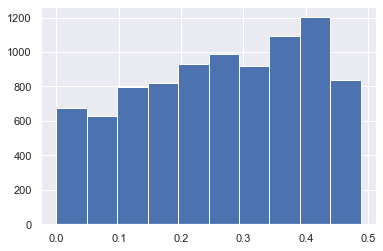

In [23]:
plt.hist(y_hat_probs)
plt.show()
# We see that all probability of default falls below 48%. If we set the threshold to 0.80 we would under predict default probability. Recall would be 0 in this instance. 

In [24]:
y_hat_30 = np.where(y_hat_probs>0.30,1,0)
y_hat_60 = np.where(y_hat_probs>0.60,1,0)

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [26]:
print(confusion_matrix(y_test, y_hat_30))
print(confusion_matrix(y_test, y_hat_60))

[[4225 2744]
 [ 743 1175]]
[[6969    0]
 [1918    0]]


If our goal is to avoid false negatives, we would choose 0.30 as our threshold because the number of false negatives is low as shown in the confusion matrices above.

In [27]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_60':y_hat_60})
df_predictions.tail()

,y_test,y_hat_probs,y_hat_30,y_hat_60
7069,0,0.167113,0,0
9033,0,0.311213,1,0
452,0,0.021799,0,0
23102,0,0.250046,0,0
25565,0,0.392535,1,0


6. Borrow my_logistic_report() function from the python notebook of class 11. (25 points)
    1. Report the Accuracy, precision, recall and f1 score along with the confusion matrix for threshold =0.5. Interpret all these statistics. Do you trust the accuracy of the model? why? 
    2. Now use threshold = 0.3 in the my_logistic_report() function. what happens to accuracy, precision, recall and f1 score? what happens to false negatives? is this consistent with you answer to question 5.4? 

In [28]:

def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5):
    logistic= LogisticRegression()
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

In [29]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,6969,0
Actual : positive,1918,0


Accuracy  = 0.78  This statistic cannot be trusted because 78% of people failed to default in the dataset, so are data is skewed to start with.

Precision = 0.0 None of the data points in our model are relevant

Recall    = 0.0 the ability to find all of the relevant instances in our data set is 0 

f1_score  = 0.0 since the f1 score is calulated using recall and precision, the f1 score is 0. 

We don't trust this model because the accuracy is highly skewed and precision, recall, and the f1 score are all 0. This model would inaccurately predict no defaults which isn't helpful when we are trying to accurately predict default probablity. 

In [30]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.3)

-----------------------------------------
Accuracy  = 0.61
Precision = 0.3
Recall    = 0.61
f1_score  = 0.4
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4225,2744
Actual : positive,743,1175


In the model with the .30 threshold we see accuracy go down but precision, recall, and the f1 score all increase. False negative predictions decreased. This is consistent with our answer in 5.4.

7. Plot the ROC curve and report the AUC score. Is your model doing a better job than random prediction (no skill)? 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.651


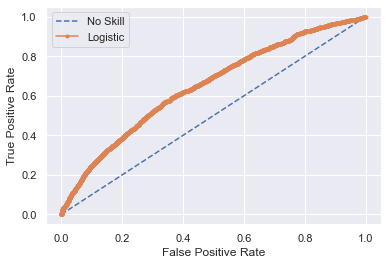

In [31]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = logistic.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Our model is doing a better job than random prediction (no skill).

8. Estimate the accuracy_test using K-Fold Cross Validation technique (try K=5 and K=10) and name them as accuracy_CV5 and accuracy_CV10. Are these numbers close to accuracy score from part 6.1? report your numbers with 5 digits precision. Why do you think all these 3 numbers are very close to each other? 

In [32]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [34]:
cv_5 = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 5 , scoring="f1")

In [ ]:
cv_10 = (cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10 , scoring="f1"))